In [1]:
import pandahouse

connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_'
}


In [ ]:
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20240220.feed_actions
WHERE toDate(time) between '2024-01-19' and '2024-01-25'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

df.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,38,248,0.153226
1,3,10326,24,132,0.181818
2,3,123580,25,122,0.204918
3,2,131473,19,98,0.193878
4,2,23985,12,44,0.272727


In [30]:
#функция для набора рандомных групп по 500 человек

def random_500_users(data, number_exp_group: int):
    return data[data['exp_group'] == number_exp_group].sample(500)

In [49]:
#прогоняем ttest 10000 раз
p_values_lst = []
for _ in range(10000):
    ttest, p_value = stats.ttest_ind(random_500_users(df, 2).ctr,
                    random_500_users(df, 3).ctr,
                    equal_var=False)
    p_values_lst.append(p_value)

<Axes: ylabel='Count'>

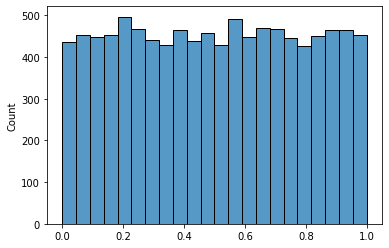

In [63]:
sns.histplot(p_values_lst)

In [72]:
#считаем долю значений p_value меньше либо равную 0.05

count = 0
for i in range(len(p_values_lst)):
    if p_values_lst[i] <= 0.05:
        count += 1
print(count / len(p_values_lst))

0.0481


Проведенные сравнения показали, что между группами 2 и 3 есть статистически значимые различия, так как при проведении 10000 ttest'ов доля P_value меньше либо равная 0.05 составила 0.0481, что говорит нам о том, что система сплитования работает некорректно. 

Надеюсь, что я правильно провел тесты и сделал вывод, до сих пор большие проблемы с интерпретацией результатов p_value
